In [4]:
import pandas as pd
data = {
    "Mes": ["Ene", "Feb", "Mar", "Abr", "May"],
    "Ventas ($)": [45000, 52000, 38000, 61000, 48000],
    "Visitantes": [15000, 18200, 12500, 20500, 16800],
    "Conversion (%)": [3.2, 2.9, 3.8, 3.1, 2.7],
    "Gasto Publicidad ($)": [8500, 9800, 7200, 11200, 9500],
    "Productos Vendidos": [450, 520, 380, 610, 480]
}

# Crear DataFrame
df = pd.DataFrame(data)


In [5]:
df

,Mes,Ventas ($),Visitantes,Conversion (%),Gasto Publicidad ($),Productos Vendidos
0,Ene,45000,15000,3.2,8500,450
1,Feb,52000,18200,2.9,9800,520
2,Mar,38000,12500,3.8,7200,380
3,Abr,61000,20500,3.1,11200,610
4,May,48000,16800,2.7,9500,480


In [7]:
# 1) Eficiencia: Ventas / Gasto Publicidad
if 'Eficiencia' not in df.columns:
    df['Eficiencia'] = df['Ventas ($)'] / df['Gasto Publicidad ($)']
mejor_ef = df.loc[df['Eficiencia'].idxmax(), ['Mes','Eficiencia']]
print(f"Mes con mayor eficiencia (ventas/gasto publicidad): {mejor_ef['Mes']} (Eficiencia={mejor_ef['Eficiencia']:.2f})")



Mes con mayor eficiencia (ventas/gasto publicidad): Abr (Eficiencia=5.45)


In [ ]:
# 2) Mes con mejor tasa de conversión y análisis de causas
mejor_conversion = df.loc[df['Conversion (%)'].idxmax()]
print(f"Mes con mayor tasa de conversión: {mejor_conversion['Mes']} (Conversion={mejor_conversion['Conversion (%)']}%)")

# Correlaciones con la conversión
corr_conv = df[['Conversion (%)','Visitantes','Gasto Publicidad ($)','Productos Vendidos']].corr()['Conversion (%)'].drop('Conversion (%)')
print('\nCorrelaciones con Conversion (%):')
print(corr_conv.round(2))

mejor_conversion, corr_conv

In [ ]:
# 3) Ticket promedio (Ventas / Productos Vendidos)
if 'Ticket_promedio' not in df.columns:
    df['Ticket_promedio'] = df['Ventas ($)'] / df['Productos Vendidos']

print('Ticket promedio por mes:')
df[['Mes','Ventas ($)','Productos Vendidos','Ticket_promedio']]


In [9]:
!pip install matplotlib 

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 18.6 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 8.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 8.3 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 7.5 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.8 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 3.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.3 MB 2.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.6/2.3 MB 2.5 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.3 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 2.5 MB/s  0:00:00
   ----------------------------

Correlación entre visitantes y ventas: 0.99


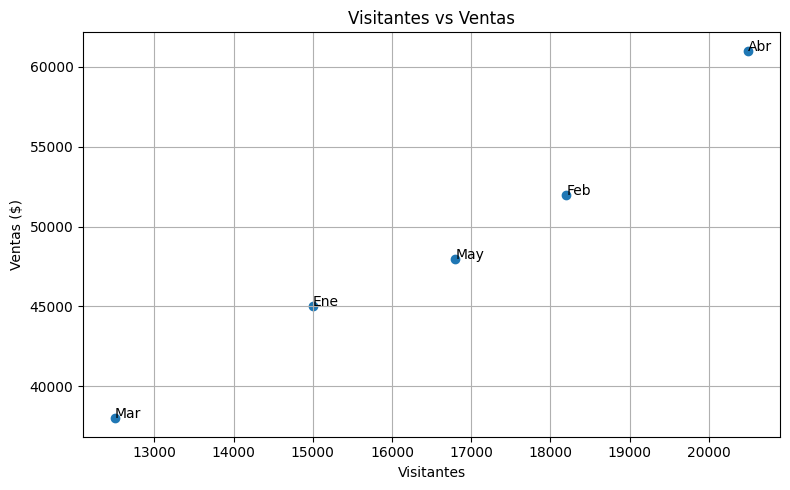

np.float64(0.989608645942918)

In [10]:
# 4) Evaluar relación entre visitantes y ventas
corr_visitantes = df['Visitantes'].corr(df['Ventas ($)'])
print(f"Correlación entre visitantes y ventas: {corr_visitantes:.2f}")

# Gráfico scatter
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df['Visitantes'], df['Ventas ($)'], c='tab:blue')
for i, m in enumerate(df['Mes']):
    plt.text(df['Visitantes'].iat[i], df['Ventas ($)'].iat[i], m)
plt.xlabel('Visitantes')
plt.ylabel('Ventas ($)')
plt.title('Visitantes vs Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

corr_visitantes

## Resumen y recomendaciones
- Identificar meses con alta eficiencia publicitaria y asignar mayor presupuesto a campañas similares.
- Analizar señales que expliquen altas conversiones (pico de visitantes, campañas específicas o disponibilidad de productos).
- Optimizar ticket promedio mediante promociones por canasta o ventas cruzadas.
- Segmentar acciones para mejorar la relación visitantes → conversiones: optimizar landing pages y CTA.
- Mantener seguimiento mensual de indicadores clave y visualizar tendencias.